In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#### A: sample distribution and sampling distribution

A partir do que foi feito na Atividade 2 “Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho”, crie  uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.

###### População

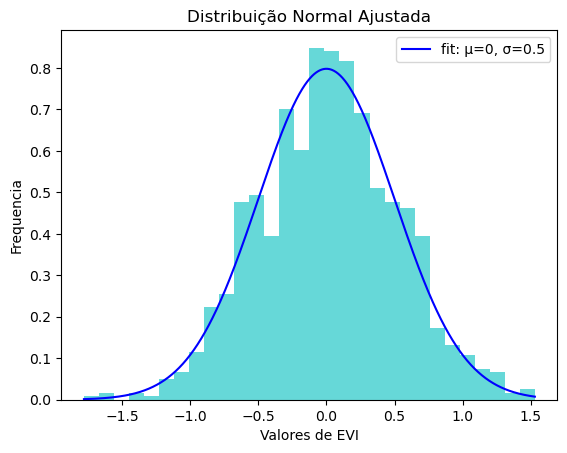

In [2]:
mu = 0
sigma =  0.5
np.random.seed(8)
data = np.random.normal(loc=mu, scale=sigma, size=1100)

#fitagem
x = np.linspace(min(data), max(data), 1100)
pdf = norm.pdf(x, mu, sigma)

#plotagem
plt.hist(data, bins=30, density=True, alpha=0.6, color='c')
plt.plot(x, pdf, 'b-', label=f'fit: μ={mu}, σ={sigma}')
plt.xlabel('Valores de EVI')
plt.ylabel('Frequencia')
plt.title('Distribuição Normal Ajustada')
plt.legend()
plt.show()

##### Sample distribution

envolve analisar uma unica amostra da população

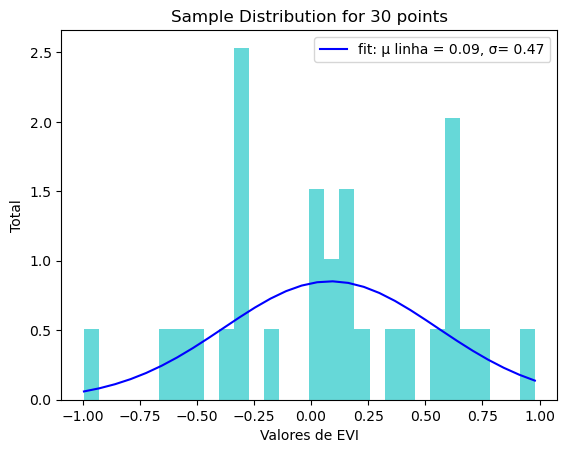

In [14]:
import random

#erro 01
#code: amostra01 = random.sample(data, 30)
#msg: Population must be a sequence (sorted).

random.seed(38)
amostra01 = random.choices(data, k=30)

#fitar a amostra numa distribuição gaussiana
mu01, sigma01 = norm.fit(amostra01)

#plotagem
x01 = np.linspace(min(amostra01), max(amostra01), 30)
pdf = norm.pdf(x01, mu01, sigma01)

plt.hist(amostra01, bins=30, density=True, alpha=0.6, color='c')
plt.plot(x01, pdf, 'b-', label=f'fit: μ linha ={mu01: .2f}, σ={sigma01: .2f}')
plt.xlabel('Valores de EVI')
plt.ylabel('Total')
plt.title('Sample Distribution for 30 points')
plt.legend()
plt.show()

**diferença bruta entre amostra e população para μ=0.09 e σ=0.42.** Os valores encontrados foram cosideravelmente diferentes, principalmente, de desvio padrão, devido a dispersão entre os valores da amostra.

##### sampling distribution

envolve analisar as médias de várias amostras da população

In [ ]:
import random

random.seed(777)
amostra02 = []

#utilizando 30 amostras de tamanho 10
for i in range(30):
    tam = 10
    amostras = random.choices(data, k=tam)

    #armazenando valor médio das amostras 
    total = sum(amostras)
    média = total/tam
    amostra02.append(média)

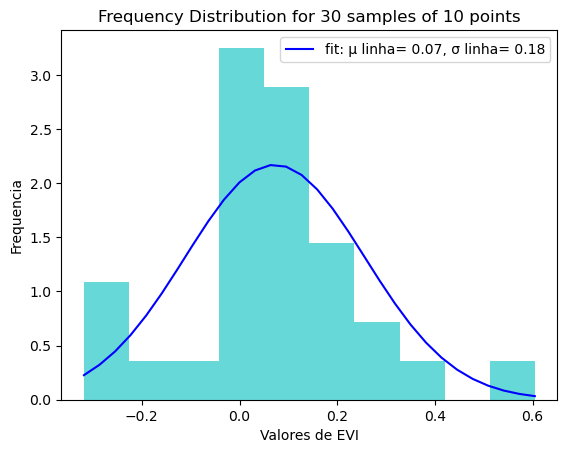

In [15]:
#fitar a amostra numa distribuição gaussiana
mu02, sigma02 = norm.fit(amostra02)

#plotagem
x02 = np.linspace(min(amostra02), max(amostra02), 30)
pdf = norm.pdf(x02, mu02, sigma02)

plt.hist(amostra02, bins=10, density=True, alpha=0.6, color='c')
plt.plot(x02, pdf, 'b-', label=f'fit: μ linha={mu02: .2f}, σ linha={sigma02: .2f}')
plt.xlabel('Valores de EVI')
plt.ylabel('Frequencia')
plt.title('Frequency Distribution for 30 samples of 10 points')
plt.legend()
plt.show()

**Diferença bruta entre média da amostra e população para μ=0.07 e σ=0.13**. Os valores de média e desvio padrão da amostra ficaram mais próximos dos da população devido ao aumento no número de amostras que reduziu o desvio padrão. Isso permite uma análise estatística mais precisa e inferências mais confiáveis sobre a população, uma vez que os dados ficam melhor representados.

##### B: TLC

Aplique o Teorema do Limite Central a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.

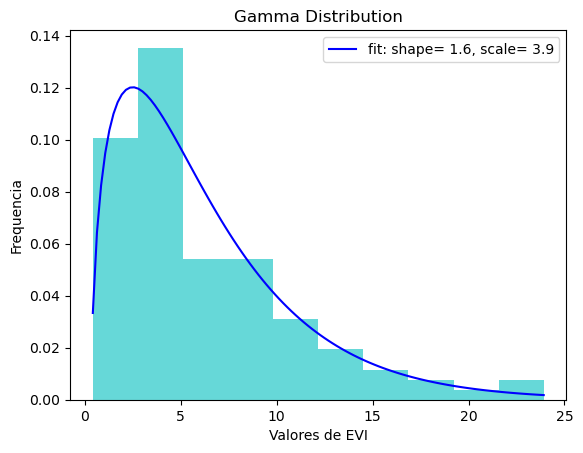

In [6]:
from scipy.stats import gamma

#criando distribuição gamma
forma = 2
escala = 3
B_data = np.random.gamma(shape=forma, scale=escala, size=110)

#fitagem
alpha, loc, theta = gamma.fit(B_data)

#plotagem
x03 = np.linspace(min(B_data), max(B_data), 110)
pdf = gamma.pdf(x03, alpha, loc=loc, scale=theta)

plt.hist(B_data, bins=10, density=True, alpha=0.6, color='c')
plt.plot(x03, pdf, 'b-', label=f'fit: shape={alpha: .1f}, scale={theta: .1f}')
plt.xlabel('Valores de EVI')
plt.ylabel('Frequencia')
plt.title('Gamma Distribution')
plt.legend()
plt.show()

**Teorema do Limite Central**

Envolve compor uma distribuição gaussiana a partir das médias de amostras de uma população

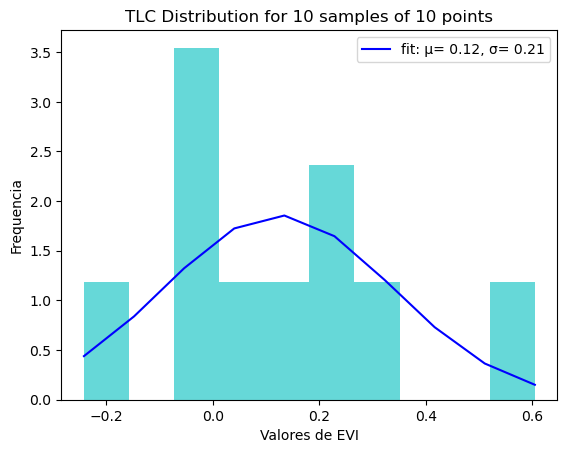

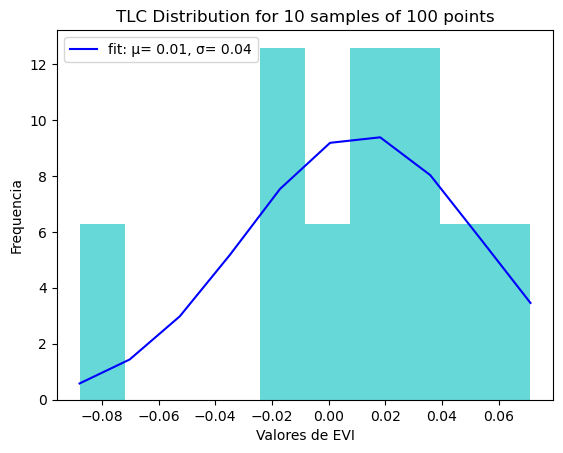

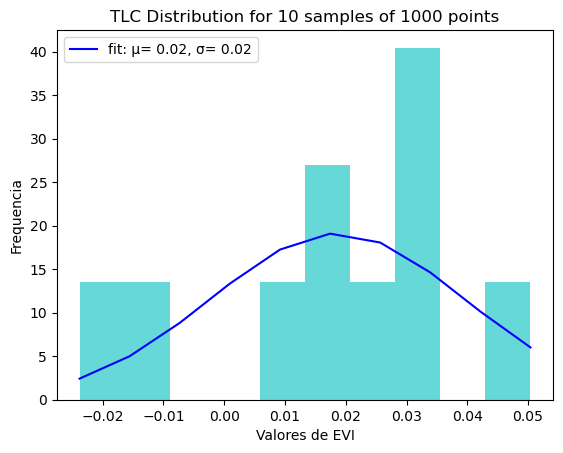

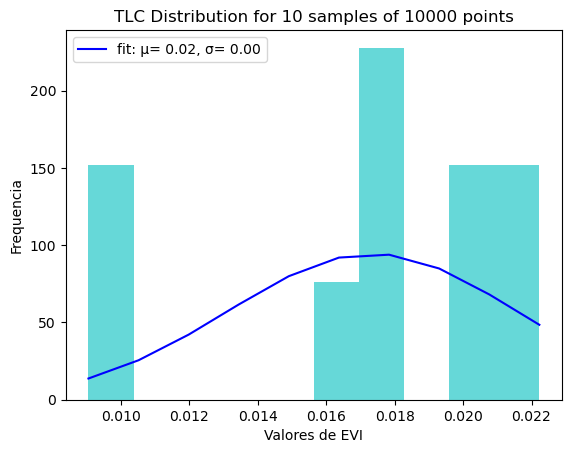

In [29]:
tam = [10, 100, 1000, 10000]
random.seed(777)

for i in range(len(tam)):
    amostras_03 = []

    #retorna 10 médias para a lista amostras_03
    for j in range(10):

        #gerando amostras aleatórias
        amostras = random.choices(data, k=tam[i])
        
        #armazenando valor médio das amostras 
        total = sum(amostras)
        media = total / tam[i]
        amostras_03.append(media)

    #fitar a amostra numa distribuição gaussiana
    mu03, sigma03 = norm.fit(amostras_03)

    #plot
    x03 = np.linspace(min(amostras_03), max(amostras_03), 10)
    pdf = norm.pdf(x03, mu03, sigma03)

    plt.hist(amostras_03, bins=10, density=True, alpha=0.6, color='c')
    plt.plot(x03, pdf, 'b-', label=f'fit: μ={mu03: .2f}, σ={sigma03: .2f}')
    plt.xlabel('Valores de EVI')
    plt.ylabel('Frequencia')
    plt.title(f'TLC Distribution for 10 samples of {tam[i]} points')
    plt.legend()
    plt.show()

**a quantidade de amostras é inversamente proporcional ao valor de desvio padrão.** a medida que o numero de amostras utilizadas cresceu o desvio padrão diminuiu, isso significa que as amostras estão mais concentradas em torno da média.

#### **C: p-value**

Faça um programa que mostra o passo a passo para calcular o p-value do evento abaixo. Coloque figuras para cada passo.

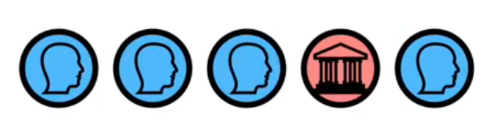

O P-value é composto por 3 probabilidades somadas:

    1. probabilidade do evento observado
    2. probabilidade de um evento igualmente raro
    3. probabilidade de eventos mais raros que o observado.

In [1]:
def pvalue(heads, tails):
    """
    Função que calcula o p-value para um teste de hipótese binomial com tamanho de amostra = 5.
    :param heads: número de sucessos (cabeças)
    :param tails: número de falhas (caras)
    :return: p-value
    """
    evento = abs(heads - tails)

    if evento == 0:
        prob_evento = 1/32 #(5h0t)
        prob_evento_igual = 1/32 #(0h5t)
        prob_evento_raro = 0 #não existe evento mais raro.

        evento = [prob_evento, prob_evento_igual, prob_evento_raro]
        return sum(evento)
    elif evento == 3:
        prob_evento = 5/32 #(4h1t)
        prob_evento_igual = 5/32 #(1h4t)
        prob_evento_raro = 2/32 #(5h0t && 0h5t)
        
        evento = [prob_evento, prob_evento_igual, prob_evento_raro]
        return sum(evento)
    elif evento == 1:
        prob_evento = 10/32 #(3h2t)
        prob_evento_igual = 10/32 #(2h3t)
        prob_evento_raro = 12/32 #(5h0t && 0h5t && 4h1t && 1h4t)

        evento = [prob_evento, prob_evento_igual, prob_evento_raro]
        return sum(evento)

In [2]:
resultado = pvalue(4, 1)
print(f"p-value: {resultado:.2f}")

p-value: 0.38


todos os evento possiveis:



**estudo de caso (4h1t)**

1. evento observado:

a probabilidade do evento é a soma de cada combinação de _4h1t_ pelo numero total de combinações possiveis para uma amostra de 5 jogadas. **(0,125)** 

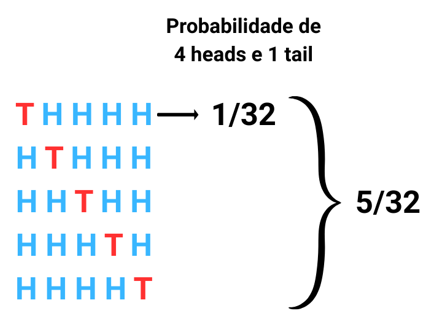

combinações possiveis (32): 

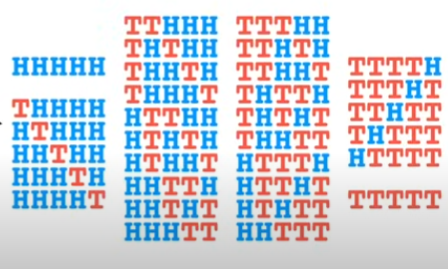

2. evento igualmente raro

o evento de raridade equivalente é de _1h4t_, que tem a mesma probabilidade. **(0,125)**

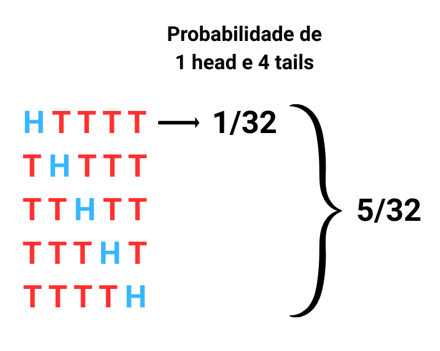

3. eventos mais raros que o observado.

Os eventos com menos chances de acontecer (mais raros) que o evento observado é _5h0t_ e _0h5t_ de probabalidade igual a 2/32. **(0,0625)**

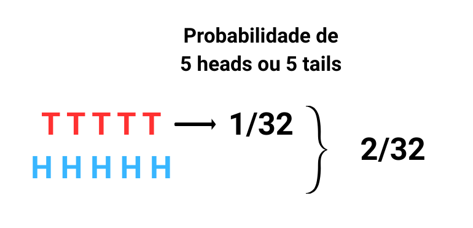

4. p-value

equivale a soma de todos os eventos **(Aproximadamente 0,38)**. A partir de uma hipotese **H0: A moeda é justa** esse valor não é suficiente para rejeitar a hipotese nula.

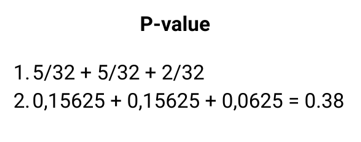
